## Исследование данных

Посмотрим на [датасет недвижимости в штате Вашингтон](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction). 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("http://www.soshnikov.com/temp/data/kc_house_data_processed.zip")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### Основные поля

Признак | Расшифровка
--------|------------
date | дата
bedrooms | кол-во спален 
bathrooms | кол-во санузлов
sqft_living | жилая площадь
sqft_lot | общая площадь
floors | кол-во этажей
waterfront | выход к воде
view | с видом или без 
condition | состояние
grade | класс жилья 
sqft_above | площадь верхнего этажа
sqft_basement | площадь подвала 
yr_built | год постройки 
yr_renovated | год ремонта
zipcode | почтовый индекс 
lat | широта 
long | долгота


#### Визуализация данных

* Постройте график зависимости цены от разных параметров, например, площади дома (`sqft_living` или `sqft_lot`). Используйте Scatter Plot
* Используйте библиотеку Seaborn для построения зависимостей между различными столбцами данных. [Этот обучающий материал](https://pyprog.pro/sns/sns_5_statistical_dependencies.html), или [вот этот](https://kgptalkie.medium.com/complete-seaborn-python-tutorial-for-data-visualization-in-python-399af0792ef4) (на англ.) содержит хорошее введение в Seaborn. 
* Посмотрите, как средняя цена меняется в зависимости от наличия вида (`view`), выхода к воде (`waterfront`), состояния дома (`condition`), наличия ремонта. Используйте `groupby` и агрегирование.

In [2]:
df['renovated'] = df['yr_renovated']>0
t = df.groupby('renovated').agg({ 'price' : 'mean', 'date' : 'count'}).rename(columns={ 'date' : 'count'})
t

,price,count
renovated,,
False,530360.818155,20699
True,760379.029540,914


<AxesSubplot:xlabel='renovated'>

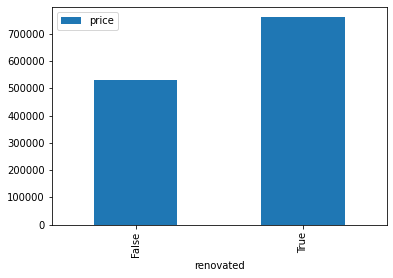

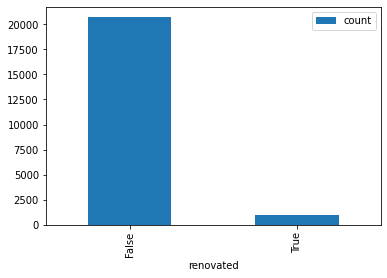

In [3]:
t.plot.bar(y='price')
t.plot.bar(y='count')

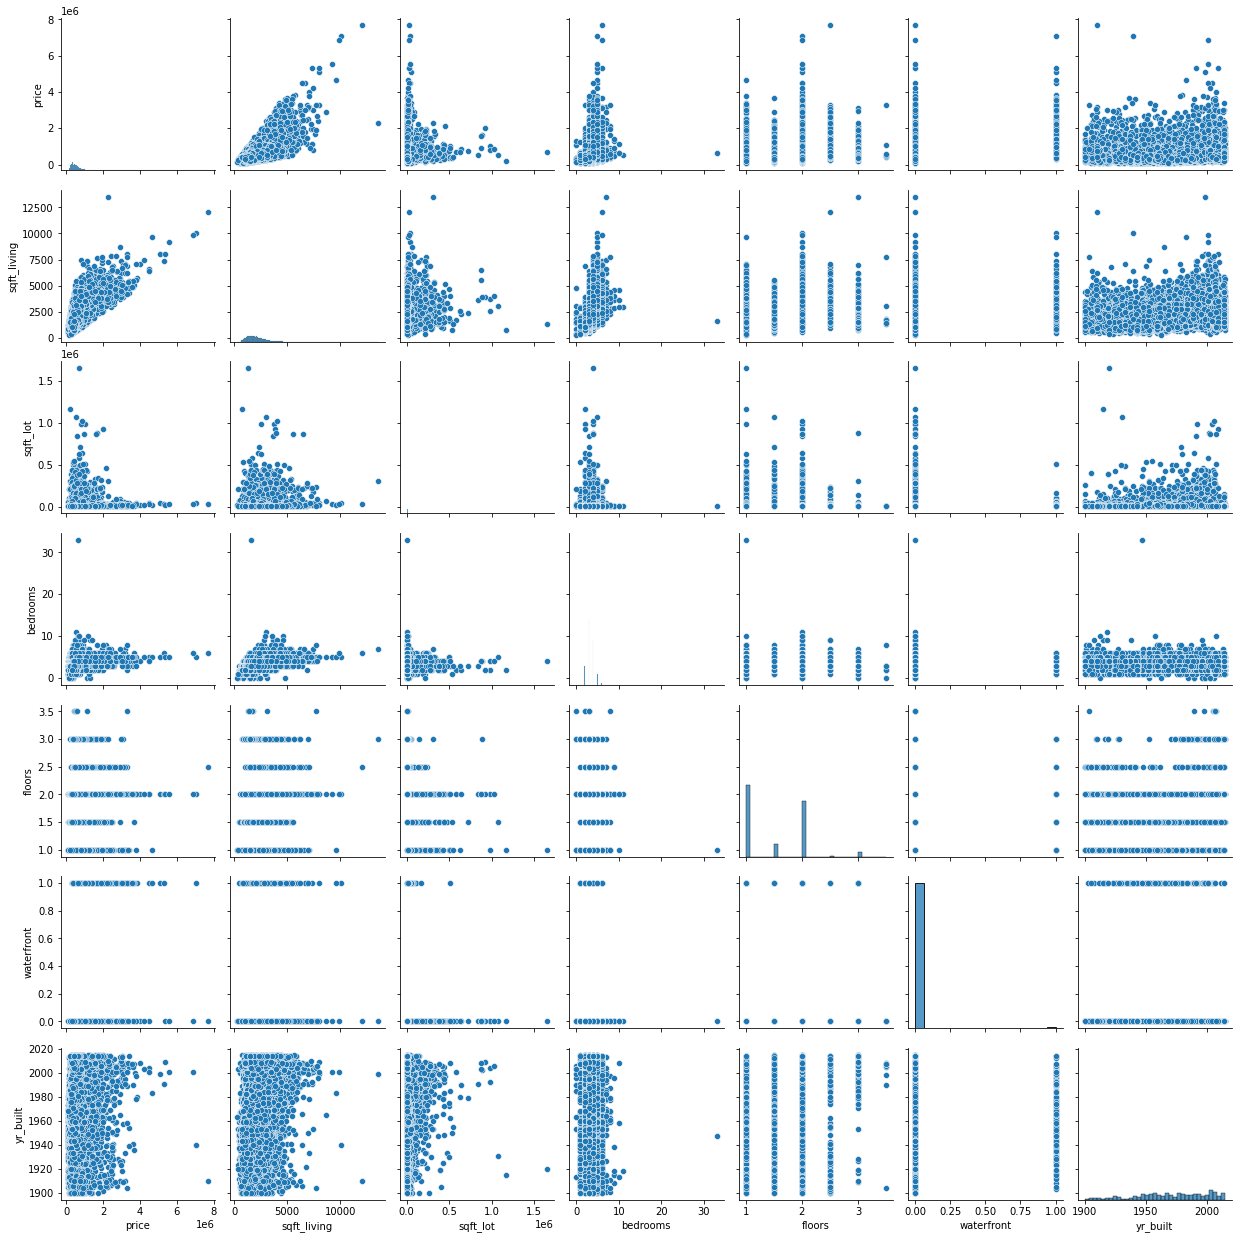

In [4]:
#df.columns
features = ['price','sqft_living','sqft_lot','bedrooms','floors','waterfront','yr_built']
sns.pairplot(df[features])

<AxesSubplot:>

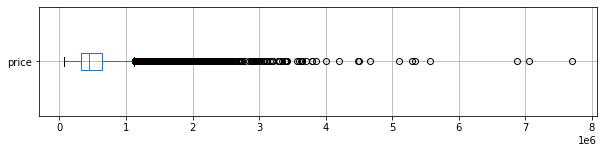

In [15]:
plt.figure(figsize=(10,2))
df.boxplot('price',vert=False)

In [21]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df['price'].describe().round(4)

count     21613.00
mean     540088.14
std      367127.20
min       75000.00
25%      321950.00
50%      450000.00
75%      645000.00
max     7700000.00
Name: price, dtype: float64

(0.0, 2000000.0)

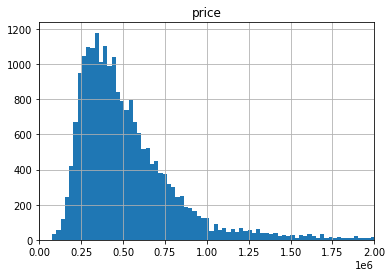

In [5]:
df.hist('price',bins=300)
plt.xlim(0,2e6)

In [6]:
df['price'].skew()

4.024069144684712

Коэффициент ассиметрии (skew):
$$
{M[(X-M[X])^3]\over\sigma^3}
$$

In [24]:
X = df['price']
((X-X.mean())**3).mean()/(X.std()**3)

4.023510599593313

In [8]:
df['logprice'] = np.log(df['price'])

<AxesSubplot:>

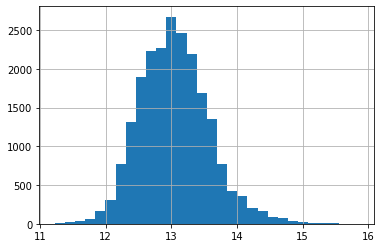

In [9]:
df['logprice'].hist(bins=30)

<AxesSubplot:xlabel='logprice', ylabel='Count'>

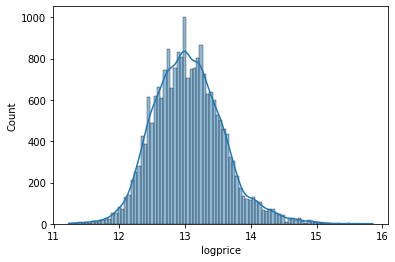

In [11]:
sns.histplot(df['logprice'],kde=True)

In [26]:
df['logprice'].mean()

13.047816917155423

<AxesSubplot:title={'center':'logprice'}, xlabel='grade'>

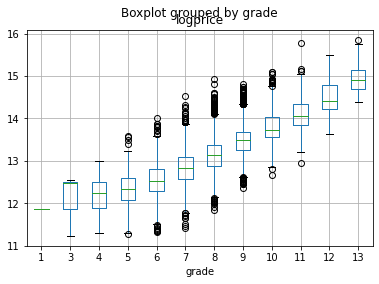

In [31]:
df.boxplot('logprice',by='grade')

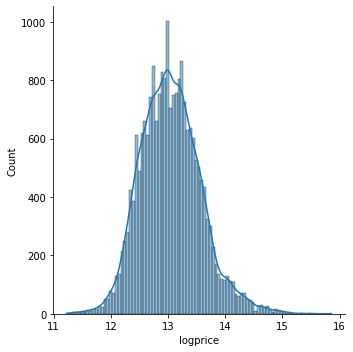

In [39]:
sns.displot(df['logprice'],kde=True)

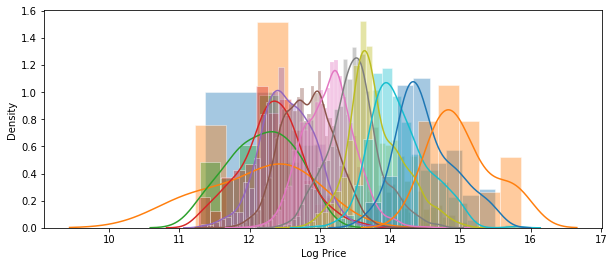

In [30]:
args = { "stat" : "density", "kde_kws" : dict(cut=3),
         "alpha": .4, "edgecolor" : (1, 1, 1, .4) }

plt.figure(figsize = (10,4))
df.groupby('grade')['logprice'].apply(lambda x: sns.histplot(x, kde=True, label = x.name, **args))
plt.xlabel('Log Price')
plt.show()

In [41]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

def print_interval(x):
    m,h = mean_confidence_interval(x)
    m,pl,ph = np.exp([m,m-h,m+h])
    print(f"grade={x.name:3d}, price={m:11.2f}-{m-pl:9.2f}+{ph-m:9.2f}, count={len(x)}")

_=df.groupby('grade')['logprice'].apply(print_interval)

grade=  1, price=  142000.00-      nan+      nan, count=1
grade=  3, price=  176538.81-148599.24+938938.40, count=3
grade=  4, price=  194376.35- 31215.23+ 37187.19, count=29
grade=  5, price=  224881.50- 12387.28+ 13109.39, count=242
grade=  6, price=  280352.14-  4625.92+  4703.53, count=2038
grade=  7, price=  375678.42-  2868.54+  2890.61, count=8981
grade=  8, price=  506873.13-  4634.62+  4677.39, count=6068
grade=  9, price=  720176.37- 10195.17+ 10341.57, count=2615
grade= 10, price=  987185.98- 22264.39+ 22778.11, count=1134
grade= 11, price= 1371195.56- 53545.80+ 55721.76, count=399
grade= 12, price= 2000717.41-166490.20+181602.28, count=90
grade= 13, price= 3361264.76-793250.08+1038282.04, count=13


c:\winapp\conda\lib\site-packages\numpy\core\_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\winapp\conda\lib\site-packages\numpy\core\_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


1975.0


<AxesSubplot:>

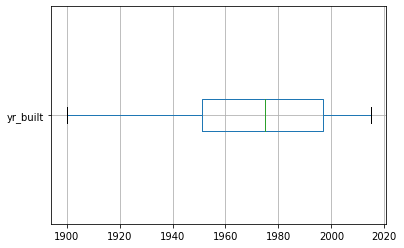

In [26]:
print(df['yr_built'].median())
df.boxplot('yr_built',vert=False)

In [27]:
df['is_old'] = df['yr_built']>df['yr_built'].median()

<AxesSubplot:xlabel='is_old'>

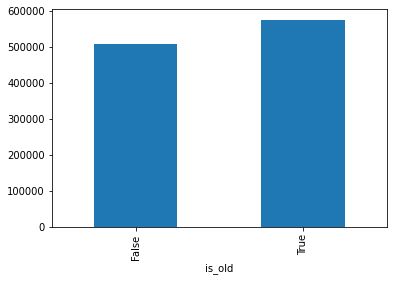

In [28]:
df.groupby('is_old').mean()['price'].plot.bar()

is_old
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: logprice, dtype: object

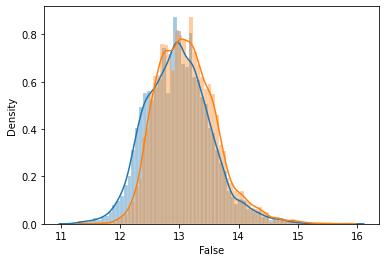

In [31]:
df.groupby('is_old')['logprice'].apply(lambda x: sns.histplot(x, kde=True, label = x.name, **args))


In [39]:
from scipy.stats import ttest_ind

tstat, pval = ttest_ind(df[df['is_old']]['logprice'], df[~df['is_old']]['logprice'],equal_var=False)
tstat, pval

(20.16556102964537, 1.3183538311649617e-89)

<AxesSubplot:title={'center':'logprice'}, xlabel='is_old'>

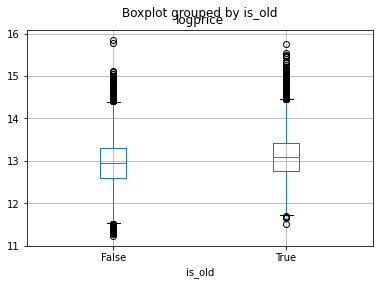

In [37]:
df.boxplot('logprice',by='is_old')

In [48]:
def print_interval(x):
    m,h = mean_confidence_interval(x)
    m,pl,ph = np.exp([m,m-h,m+h])
    print(f"is_old={x.name:1}, price={m:11.2f}-{m-pl:9.2f}+{ph-m:9.2f}, count={len(x)}")

_=df.groupby('is_old')['logprice'].apply(print_interval)

is_old=0, price=  432415.28-  4360.23+  4404.65, count=10934
is_old=1, price=  498909.38-  4726.53+  4771.73, count=10679
